# Dividend Yield Analysis

In [1]:
import numpy as np
import pandas as pd 
import scipy as sci
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
mdt = pd.read_excel('divyld_analysis.xlsx',date_parser=True,index_col='Date',na_values=0)
mdt.columns = ['Div_Yield','Price']
mdt = mdt.round(2)
mdt.tail()

,Div_Yield,Price
Date,,
2016-06-17,1.81,84.14
2016-06-24,1.83,83.26
2016-07-01,1.75,87.03
2016-07-08,1.78,88.36
2016-07-15,1.78,88.36


In [3]:
def get_data(stock,dates):
    df = pd.DataFrame(index=dates)
    df_temp = pd.read_excel(stock,date_parser=True,index_col='Date',na_values=['nan'])
    df = df.join(df_temp)
    df = df.dropna(how='any')
    df.columns = ['Div_Yield','Price']
    return df
get_data('divyld_analysis.xlsx',pd.date_range('2005-01-01','2015-12-31')).tail()

,Div_Yield,Price
2015-11-27,1.7918,76.46
2015-12-04,1.7533,78.14
2015-12-11,1.7873,76.65
2015-12-18,1.7953,76.31
2015-12-25,1.8614,77.63


In [4]:
x = get_data('divyld_analysis.xlsx',pd.date_range('2005-01-01','2015-12-31')).Div_Yield
x.tail()

2015-11-27    1.7918
2015-12-04    1.7533
2015-12-11    1.7873
2015-12-18    1.7953
2015-12-25    1.8614
Freq: 7D, Name: Div_Yield, dtype: float64

### Simple Moving Average

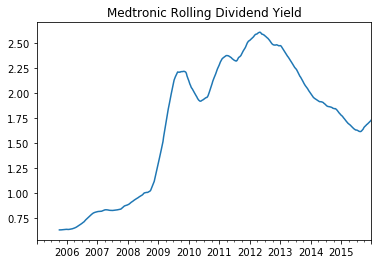

In [5]:
def get_rolling_mean(values,window):
    return pd.rolling_mean(values,window=window)

get_rolling_mean(x,40).plot(title='Medtronic Rolling Dividend Yield')

### Bollinger Bands

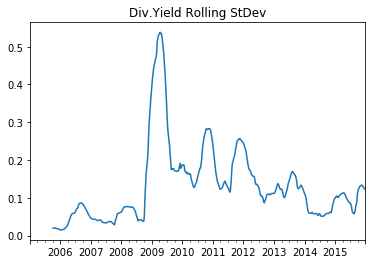

In [6]:
def get_rolling_stdev(values,window):
    return pd.rolling_std(values,window=window)
get_rolling_stdev(x,40).plot(title='Div.Yield Rolling StDev')

In [7]:
def get_bollinger_bands(rm,rstd):
    #Return upper and lower bands
    upper_band = rm + rstd * 2
    lower_band = rm - rstd * 2
    return upper_band, lower_band

In [8]:
def test_run():
    # Read data
    dates = pd.date_range('2010-01-01', '2016-12-31')
    df = get_data('divyld_analysis.xlsx', dates)

    # Compute Bollinger Bands

    # 1. Compute rolling mean
    rm_mdt = get_rolling_mean(df.Div_Yield, window=20)

    # 2. Compute rolling standard deviation
    rstd_mdt = get_rolling_stdev(df.Div_Yield, window=20)

    # 3. Compute upper and lower bands
    upper_band, lower_band = get_bollinger_bands(rm_mdt, rstd_mdt)
    
    # Plot raw SPY values, rolling mean and Bollinger Bands
    ax = df.Div_Yield.plot(title="Bollinger Bands", label='Medtronic Dividend Yield')
    rm_mdt.plot(label='Rolling mean', ax=ax)
    upper_band.plot(label='upper band', ax=ax)
    lower_band.plot(label='lower band', ax=ax)

    # Add axis labels and legend
    ax.set_xlabel("Date")
    ax.set_ylabel("Dividend Yield")
    ax.legend(loc=0)  #loc=0 finds the optimal location to place legend
    plt.show()

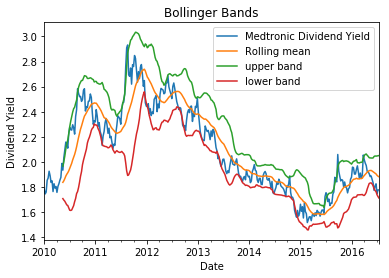

In [9]:
if __name__ == "__main__":
    test_run()

In [ ]:
Nickolas4